# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link).

In [2]:
db_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs1/20250309_sparc4acs1_db.csv'

phot_lightcurve_example ='/media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs1/20250309_s4c1_v1025cen_POLAR_L4_S+N_lc.fits'

polar_stack_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs1/20250309_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits'

polar_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs1/20250309_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits'

polar_time_series_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs1/20250309_s4c1_v1025cen_POLAR_L4_ts.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [3]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T03:10:48.000000,16.0,09:06:00.01,-47:18:58.17,Vela1-95,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,1,L2,None,True
1,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T03:11:06.527000,16.0,09:06:00.01,-47:18:58.17,Vela1-95,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,2,L2,None,True
2,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T03:11:25.126000,16.0,09:06:00.01,-47:18:58.17,Vela1-95,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,3,L2,None,True
3,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T03:11:43.529000,16.0,09:06:00.01,-47:18:58.17,Vela1-95,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,4,L2,None,True
4,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T03:12:02.032000,16.0,09:06:00.01,-47:18:58.17,Vela1-95,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,5,L2,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T08:46:15.516943,3.0,12:38:16.18,-38:42:45.0,DOMEFLAT,FLAT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,16,L4,None,True
804,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T08:46:19.637005,3.0,12:38:16.18,-38:42:45.0,DOMEFLAT,FLAT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,16,L4,None,True
805,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T08:46:23.757068,3.0,12:38:16.18,-38:42:45.0,DOMEFLAT,FLAT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,16,L4,None,True
806,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-10T08:46:27.877131,3.0,12:38:16.18,-38:42:45.0,DOMEFLAT,FLAT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,16,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [4]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs1/20250309_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   46R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   46R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   46R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   46R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   46R x 13C   [I11, D25.17,

Then we plot the science frame using the `sparc4.product_plots` library

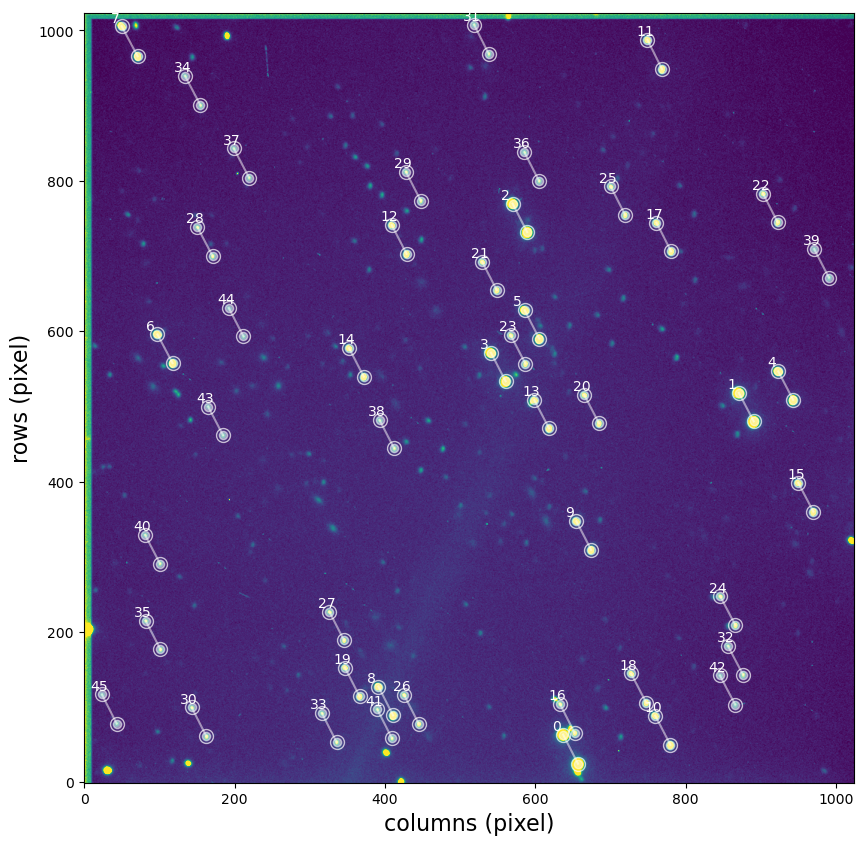

In [5]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [6]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,189.553091,-38.759817,656.753459,24.741363,5.584278,5.584278,-9.500999,0.001664,-8.434898,0.000965,10,0
1,1,189.527386,-38.716302,890.456817,480.072333,6.171439,6.171439,-9.211039,0.001980,-8.414543,0.000904,10,0
2,2,189.564701,-38.693942,589.152189,731.749447,5.825966,5.825966,-9.001949,0.002258,-8.413166,0.000843,10,0
3,3,189.567157,-38.712629,560.481314,533.454304,5.901922,5.901922,-8.680746,0.002828,-8.430387,0.000922,10,0
4,4,189.521256,-38.713412,942.832256,508.772986,6.177410,6.177410,-8.025657,0.004561,-8.409705,0.001014,10,0
5,5,189.562061,-38.707166,605.233522,590.060811,5.819357,5.819357,-7.862588,0.005119,-8.426303,0.000858,10,0
6,6,189.620392,-38.712133,117.593589,557.498676,5.408440,5.408440,-7.653653,0.005956,-8.412828,0.000778,10,0
7,7,189.628127,-38.673927,71.077574,965.629694,5.967972,5.967972,-7.463042,0.006839,-8.382680,0.000743,10,0
8,8,189.582844,-38.754818,410.824696,89.067552,5.381810,5.381810,-7.309237,0.008027,-8.444618,0.000879,10,0
9,9,189.552409,-38.733171,674.139033,309.326858,5.728984,5.728984,-6.949121,0.010614,-8.425820,0.000759,10,0


Below we select the source with index number 3 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 1, and 2, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

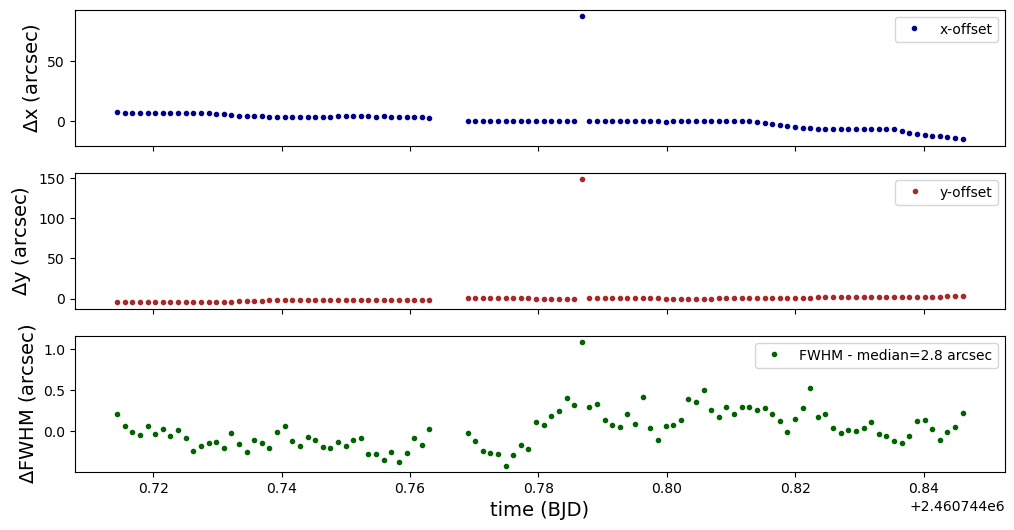

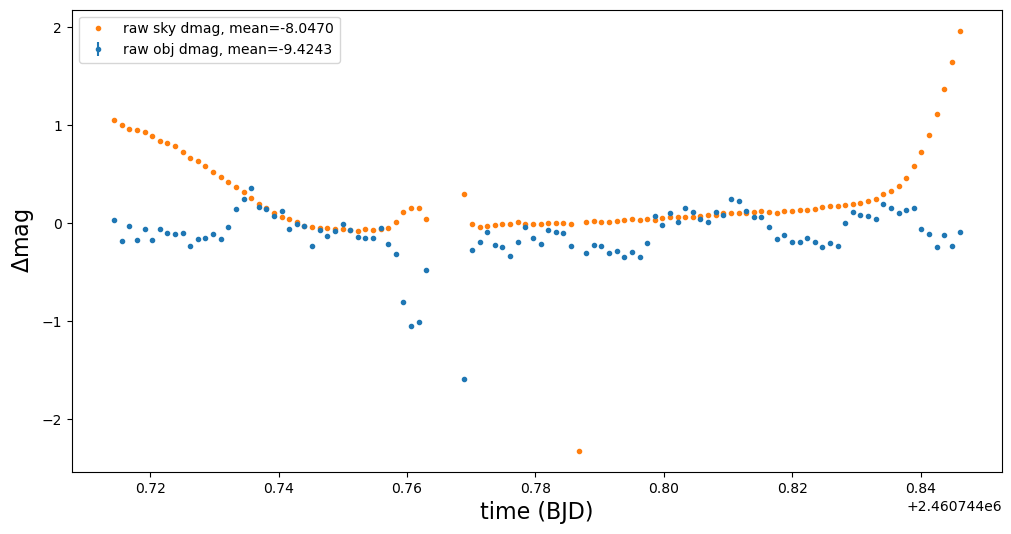

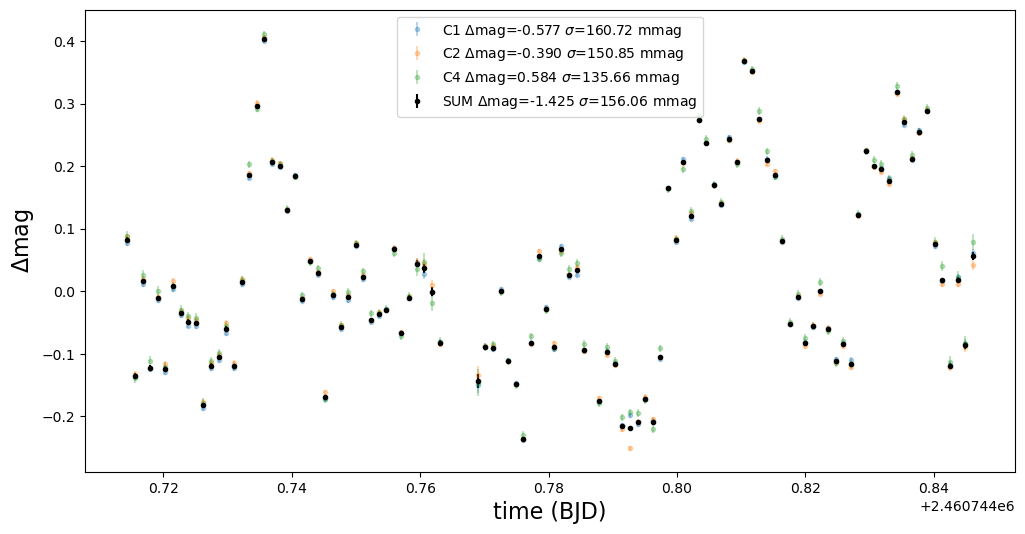

       TIME                x          ...       diffmagsum     
------------------ ------------------ ... ---------------------
 2460744.714380605  550.7092136638603 ...   0.08237100394038777
 2460744.715565619  549.9592136638603 ...  -0.13559847848590678
  2460744.71675127  549.7092136638603 ...   0.01625702610197166
  2460744.71793846  548.9592136638603 ...  -0.12248681842743459
  2460744.71912403  548.9592136638603 ... -0.010699201231378908
2460744.7203112314  548.9592136638603 ...  -0.12378592335361915
 2460744.721496489  548.7092136638603 ...   0.00831812812113597
               ...                ... ...                   ...
 2460744.838946829 497.20921366386034 ...   0.28886610022208536
2460744.8401321084 495.45921366386034 ...   0.07477008916743877
 2460744.841317318 492.45921366386034 ...   0.01742909309449381
2460744.8425048427 490.95921366386034 ...  -0.11879169936854872
 2460744.843690099 489.20921366386034 ...  0.017850701963443072
 2460744.844877971 486.95921366386034 ..

In [7]:
catalog = 'CATALOG_PHOT_AP010'
target=3
comps=[1,2,4]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [8]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs1/20250309_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     675   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU    946   46R x 467C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

Below we print one of the catalog extensions

In [9]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

,APERINDEX,APER,SRCINDEX,RA,DEC,X1,Y1,X2,Y2,FWHM,...,FE0105,EFE0105,FO0106,EFO0106,FE0106,EFE0106,FO0107,EFO0107,FE0107,EFE0107
0,2.0,10.0,0.0,189.553091,-38.759817,636.956650,63.467571,656.753459,24.741363,5.854939,...,7239.431447,19.535662,5808.562949,21.186947,7187.290942,21.460479,5770.054819,23.707345,7123.293240,24.759117
1,2.0,10.0,1.0,189.527386,-38.716302,870.720321,517.958870,890.456817,480.072333,6.159100,...,5150.140745,19.107841,4415.409159,20.832329,5160.868072,20.998821,4437.867843,23.599677,5091.371777,23.732603
2,2.0,10.0,2.0,189.564701,-38.693942,569.768327,769.725905,589.152189,731.749447,5.948619,...,4435.873591,18.200374,3707.971092,20.004627,4402.780622,20.288970,3575.428162,26.216285,4582.821832,25.357372
3,2.0,10.0,3.0,189.567157,-38.712629,540.937113,571.440591,560.481314,533.454304,6.005706,...,3048.526860,18.262707,2483.651521,20.168951,2728.947788,20.500199,2987.645569,25.698486,2935.222803,24.266447
4,2.0,10.0,4.0,189.521256,-38.713412,923.121094,546.541504,942.832256,508.772986,6.160546,...,1809.609976,18.363985,1505.387989,20.360954,1782.007093,20.271548,1456.493714,23.572408,1761.771325,23.513412
5,2.0,10.0,5.0,189.562061,-38.707166,585.850107,627.831737,605.233522,590.060811,5.916029,...,1507.194575,18.099583,1303.842144,19.484804,1505.754215,20.260579,1175.840375,27.295789,1425.161146,24.627843
6,2.0,10.0,6.0,189.620392,-38.712133,97.482873,595.688370,117.593589,557.498676,5.715024,...,1144.532365,16.908764,1042.826530,19.138054,1159.128027,19.067239,1023.706857,21.780893,1124.835462,21.576881
7,2.0,10.0,7.0,189.628127,-38.673927,49.847770,1005.631999,71.077574,965.629694,6.009033,...,915.001195,16.513344,NaN,NaN,851.780530,18.349692,NaN,NaN,626.291057,18.727606
8,2.0,10.0,8.0,189.582844,-38.754818,391.385738,127.403725,410.824696,89.067552,5.743096,...,1008.733773,17.795728,730.024940,20.104610,1025.413122,19.954278,721.473081,22.957175,1007.510345,22.782799
9,2.0,10.0,9.0,189.552409,-38.733171,654.614911,347.211588,674.139033,309.326858,5.971899,...,655.324969,17.315368,531.974580,19.614697,625.222197,19.558437,492.883298,22.604139,600.236971,22.395708


Then we can print all column names to check the data available in each catalog

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0105', 'EFE0105', 'FO0106', 'EFO0106', 'FE0106', 'EFE0106', 'FO0107',
       'EFO0107', 'FE0107', 'EFE0107'],
      dtype='object', length=467)

Finally, we can select the source of interest (in this case index=0) and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-09-18 00:59:06,181 astropop - INFO - Normalization disabled.  [__init__]


2025-09-18 00:59:06,181 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-09-18 00:59:06,191 root - INFO - Source index: i=3   [pipeline_lib]


2025-09-18 00:59:06,191 | INFO | Source index: i=3 


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-09-18 00:59:06,192 root - INFO - Source RA=189.5671565029781 Dec=-38.71262898481498 mag=nan+-nan  [pipeline_lib]


2025-09-18 00:59:06,192 | INFO | Source RA=189.5671565029781 Dec=-38.71262898481498 mag=nan+-nan


2025-09-18 00:59:06,193 root - INFO - Best aperture radius: 8.0 pixels  [pipeline_lib]


2025-09-18 00:59:06,193 | INFO | Best aperture radius: 8.0 pixels


2025-09-18 00:59:06,194 root - INFO - Polarization in Q: -0.0035+-0.0007  [pipeline_lib]


2025-09-18 00:59:06,194 | INFO | Polarization in Q: -0.0035+-0.0007


2025-09-18 00:59:06,194 root - INFO - Polarization in U: -0.002+-0.001  [pipeline_lib]


2025-09-18 00:59:06,194 | INFO | Polarization in U: -0.002+-0.001


2025-09-18 00:59:06,195 root - INFO - Polarization in V: 0.0005+-0.0006  [pipeline_lib]


2025-09-18 00:59:06,195 | INFO | Polarization in V: 0.0005+-0.0006


2025-09-18 00:59:06,196 root - INFO - Total linear polarization p: 0.0039+-0.0008  [pipeline_lib]


2025-09-18 00:59:06,196 | INFO | Total linear polarization p: 0.0039+-0.0008


2025-09-18 00:59:06,196 root - INFO - Angle of polarization theta: 104+-6 deg  [pipeline_lib]


2025-09-18 00:59:06,196 | INFO | Angle of polarization theta: 104+-6 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-09-18 00:59:06,197 root - INFO - Free constant k: 0.9045513858939058+-0.0  [pipeline_lib]


2025-09-18 00:59:06,197 | INFO | Free constant k: 0.9045513858939058+-0.0


2025-09-18 00:59:06,198 root - INFO - Zero of polarization: 28.2+-0.0  [pipeline_lib]


2025-09-18 00:59:06,198 | INFO | Zero of polarization: 28.2+-0.0


2025-09-18 00:59:06,199 root - INFO - RMS of zi residuals: 0.004991829240487719  [pipeline_lib]


2025-09-18 00:59:06,199 | INFO | RMS of zi residuals: 0.004991829240487719


2025-09-18 00:59:06,200 root - INFO - Reduced chi-square (n=107.0, DOF=104.0): 3.09  [pipeline_lib]


2025-09-18 00:59:06,200 | INFO | Reduced chi-square (n=107.0, DOF=104.0): 3.09


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-09-18 00:59:06,287 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:59:06,287 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:59:06,292 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:59:06,292 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:59:06,502 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:59:06,502 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:59:06,508 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:59:06,508 | INFO | Substituting symbol \perp from STIXGeneral


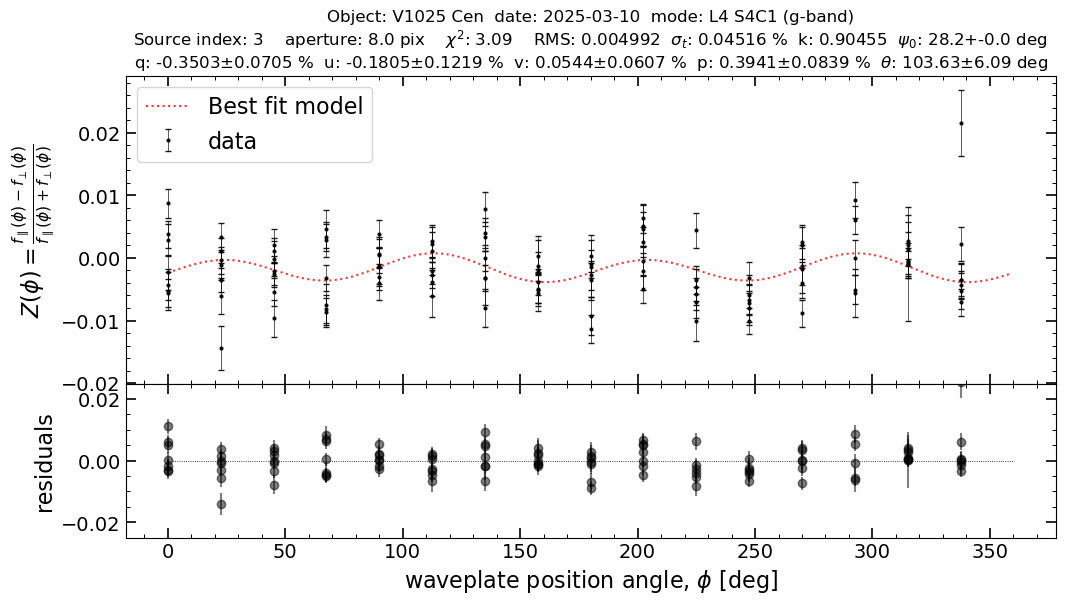

In [11]:
source_index = 3

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [12]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250309/sparc4acs1/20250309_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
SOURCE_INDEX : 3
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 2
APERTURE_RADIUS : 8.0
NEXPS : 108
MAG : nan+-nan
RA : 189.5671565029781
DEC : -38.71262898481498
FWHM : 6.005706310820784
X1 : 540.9371131634847
Y1 : 571.4405906668175
X2 : 560.481314164236
Y2 : 533.4543036290364
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315. 

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [13]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.39+-0.08 %  Angle of polarization: 104+-6 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [14]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [15]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

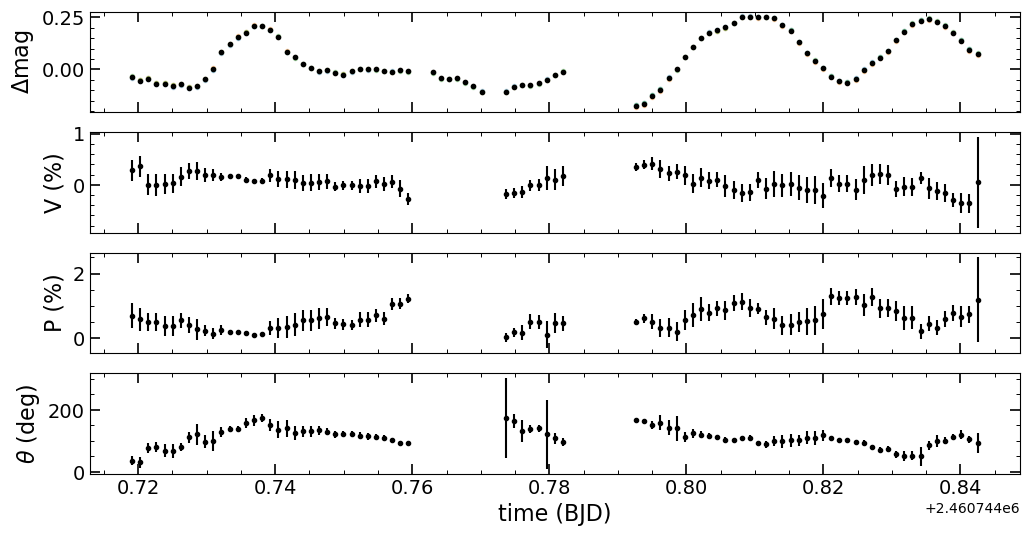

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-0.03902639199930569,0.0016452595933850339,-0.03472503722052522,0.0017127367314982648,-0.033852450103511345,0.002735507610685368,2460744.719109879,540.9371131634847,571.4405906668175,560.481314164236,533.4543036290364,6.043564557231671,-11.689418405579444,0.0014114624122335234,-13.152112269144155,0.002673325589172068,-0.036673692311270045,0.006994398333318889,0.003788953546364866,35.94392445289133,15.492979704891313
-0.05663846655988358,0.0016423774706161255,-0.052092889615451554,0.0017079690903705935,-0.05105142739225599,0.002717609765748774,2460744.720295026,540.1871131634847,572.4405906668175,559.731314164236,534.4543036290364,5.960864314292738,-11.670489949905088,0.001413775281995313,-13.150637437013113,0.0026464473099986514,-0.05412731585458452,0.005883472480232004,0.0035130537226224405,30.527721042966792,17.077217035447035
-0.046896702251554956,0.001611577314132481,-0.04172559949314447,0.0016777794718976003,-0.03935898992601672,0.002680123243401664,2460744.721481626,539.9371131634847,572.6905906668175,559.481314164236,534.7043036290364,5.927189494956346,-11.680478247202677,0.0013845699821944436,-13.150338752045716,0.0026161200065722406,-0.043840333589598046,0.0050739384089020945,0.00286242842332562,77.83206210622292,16.134498748246905
-0.07119881733389022,0.0016197675874047052,-0.0659101932126962,0.0016831787814990434,-0.06447189617250615,0.002662164415729992,2460744.722667832,539.1871131634847,572.4405906668175,558.731314164236,534.4543036290364,5.9051243694918645,-11.655787572894234,0.0013993916733633874,-13.150031744365148,0.0025824341342303636,-0.06822400021747299,0.004942969978905764,0.0027814439663876003,79.79793831162485,16.093421116892028
-0.07109658938570185,0.0015950396981588874,-0.06498190148985827,0.0016576876077928793,-0.0646188351518937,0.0026197930791525157,2460744.7238532286,539.1871131634847,572.4405906668175,558.731314164236,534.4543036290364,5.882007782474547,-11.656959761085426,0.0013778405241669114,-13.15082346003592,0.0025416652201260977,-0.06784352769705215,0.0038166967317272774,0.00297871776050806,68.43229901279396,22.320696125095715
-0.08334126762793126,0.0015816994209567157,-0.07673498412187207,0.0016436566621172064,-0.07723807848318742,0.0025833002481425817,2460744.725040609,539.1871131634847,572.4405906668175,558.731314164236,534.4543036290364,5.838895475970739,-11.645714323168903,0.0013699315970026695,-13.15169260187766,0.002499336454307774,-0.07995810745531529,0.0038766192291412134,0.003111309955136587,66.24991101380023,22.95388312785594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.24288039021745966,0.0012247064840526466,0.23855889057767854,0.001285492445171574,0.24496616215741263,0.002237521273076921,2460744.8353714007,499.6871131634847,591.6905906668175,519.231314164236,553.7043036290364,5.902622998356981,-11.898705854725016,0.0009697168579139153,-13.083296336664427,0.0023103778679207957,0.24142968931402997,0.0045812974666810105,0.0024153941272326397,85.10022598424949,15.078757173325341
0.22845435980105577,0.0012625782640254865,0.22507898938457593,0.0013241698254298972,0.22996106424663054,0.0023003299833484676,2460744.8365578027,499.4371131634847,591.6905906668175,518.981314164236,553.7043036290364,5.902622998356981,-11.882945307174772,0.0010041295769918003,-13.081687364318608,0.0023694343226794493,0.2272781141096054,0.003301118987449177,0.0023051414812835284,99.21548511609265,19.97112088820879


In [16]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=3, 
                             comps=[1,2,4], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)